# Exploration

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split

In [2]:
# Getting data
df = pd.read_csv('data_science.csv')

In [3]:
# Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['experience', 'ability', 'skill'])

In [5]:
def clean_skills(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill', 'programming', 'language'])

In [6]:
df.requirements = df.requirements.apply(clean)

In [7]:
df.skills = df.skills.apply(clean_skills)

In [8]:
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((119, 13), (52, 13), (43, 13))

# Requirements vs. Degree

In [9]:
labels = pd.concat([train.label.value_counts(),
                    train.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
h,109,0.915966
b,10,0.084034


In [10]:
all_text = ' '.join(train.requirements)
b_text = ' '.join(train[train.label == 'b'].requirements)
h_text = ' '.join(train[train.label == 'h'].requirements)
all_text = clean(all_text)
b_text = clean(b_text)
h_text = clean(h_text)

In [11]:
pd.Series(all_text.split()).value_counts().head(20)

data           572
language       186
science        175
programming    173
learning       151
year           149
analytics      141
python         131
analysis       130
sql            126
degree         124
business       115
microsoft      113
machine        111
r               97
statistic       94
c               84
strong          83
engineering     82
field           77
dtype: int64

In [12]:
all_freq = pd.Series(all_text.split()).value_counts()
b_freq = pd.Series(b_text.split()).value_counts()
h_freq = pd.Series(h_text.split()).value_counts()

In [13]:
word_counts = pd.concat([all_freq, b_freq, h_freq], sort=True, axis=1)
word_counts.columns = ['all', 'b', 'h']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [14]:
word_counts.sort_values(by='all', ascending=False)

,all,b,h
data,572,65,507
language,186,15,171
science,175,33,142
programming,173,17,156
learning,151,7,144
...,...,...,...
ides,1,0,1
identity,1,0,1
ideation,1,0,1
ideally,1,0,1


In [15]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])

,all,b,h,p_b,p_h
0,1,1,0,1.000000,0.000000
1,18,1,17,0.055556,0.944444
10,1,0,1,0.000000,1.000000
100,1,0,1,0.000000,1.000000
10sql,1,0,1,0.000000,1.000000
...,...,...,...,...,...
yearspython,1,0,1,0.000000,1.000000
youll,2,0,2,0.000000,1.000000
youre,2,1,1,0.500000,0.500000
youve,1,0,1,0.000000,1.000000


<AxesSubplot:>

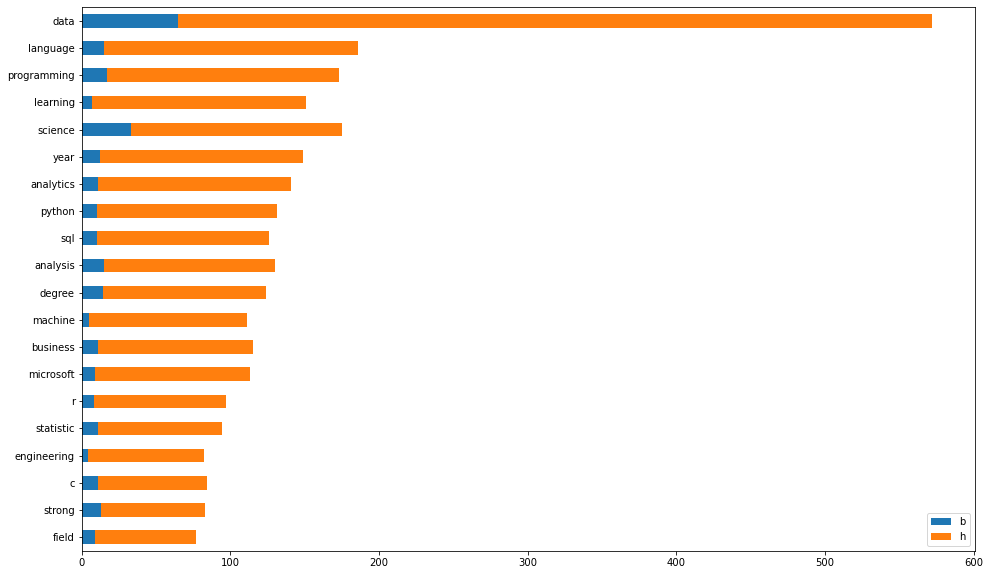

In [16]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['b', 'h']]\
    .sort_values(by='h')\
    .plot.barh(stacked=True, figsize = (16,10))

In [17]:
word_counts[(word_counts.b > 10) & (word_counts.h > 10)]\
    .assign(ratio=lambda df: df.b/df.h)\
    .sort_values(by='ratio')

,all,b,h,ratio
analytics,141,11,130,0.084615
year,149,12,137,0.087591
language,186,15,171,0.087719
business,115,11,104,0.105769
programming,173,17,156,0.108974
degree,124,14,110,0.127273
data,572,65,507,0.128205
analysis,130,15,115,0.130435
statistic,94,11,83,0.132530
c,84,11,73,0.150685


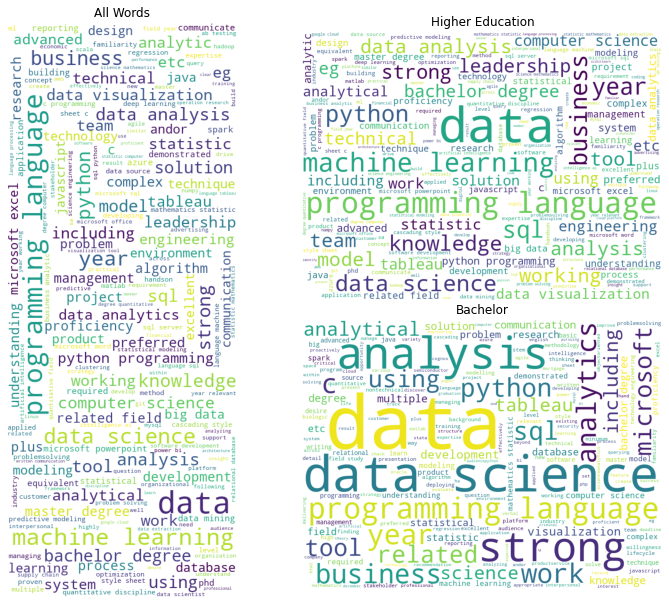

In [18]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
h_cloud = WordCloud(background_color='white', height=600, width=800).generate(h_text)
b_cloud = WordCloud(background_color='white', height=600, width=800).generate(b_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(h_cloud)
axs[2].imshow(b_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Higher Education')
axs[2].set_title('Bachelor')

for ax in axs: ax.axis('off')

### Bigrams

In [19]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(programming, language)    144
(machine, learning)        109
(data, science)             95
(data, analysis)            60
(computer, science)         53
(data, visualization)       44
(python, programming)       40
(3, year)                   39
(data, analytics)           39
(r, programming)            36
(bachelor, degree)          36
(related, field)            35
(microsoft, excel)          28
(big, data)                 28
(5, year)                   24
(microsoft, powerpoint)     24
(analytics, data)           22
(master, degree)            22
(python, r)                 22
(r, python)                 21
dtype: int64

#### Higher Education

In [20]:
top_20_h_bigrams = (pd.Series(nltk.ngrams(h_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_h_bigrams.head()

(programming, language)    131
(machine, learning)        104
(data, science)             76
(data, analysis)            54
(computer, science)         47
dtype: int64

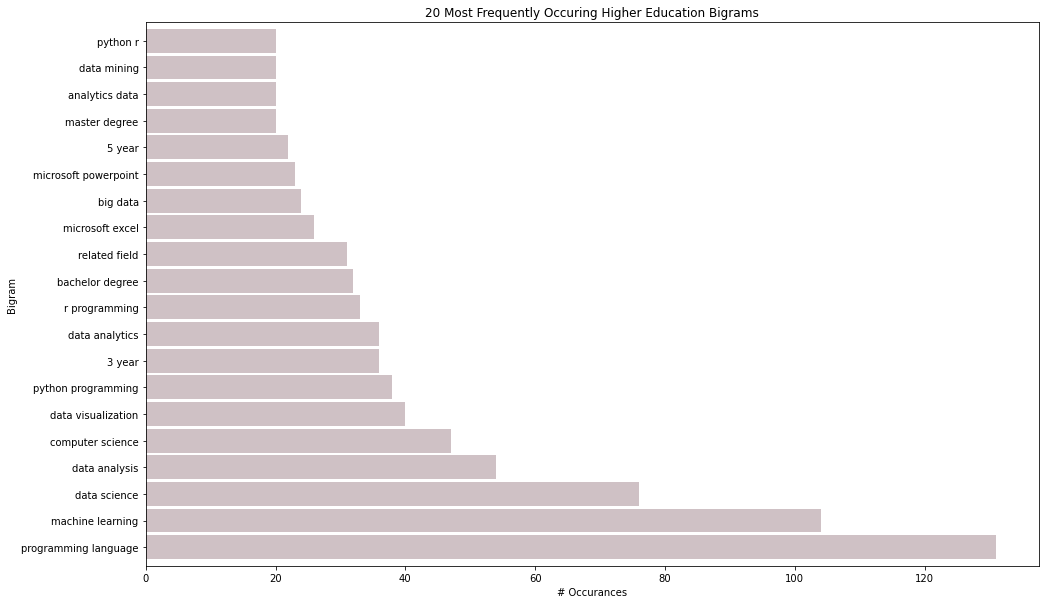

In [21]:
top_20_h_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Higher Education Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_h_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

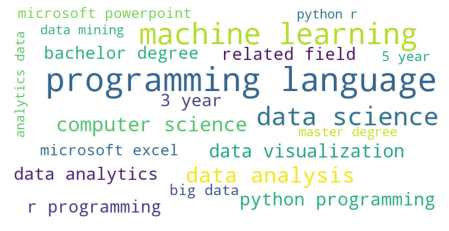

In [22]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_h_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [23]:
top_20_b_bigrams = (pd.Series(nltk.ngrams(b_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_b_bigrams.head()

(data, science)             19
(programming, language)     13
(computer, science)          6
(data, analysis)             6
(mathematics, statistic)     5
dtype: int64

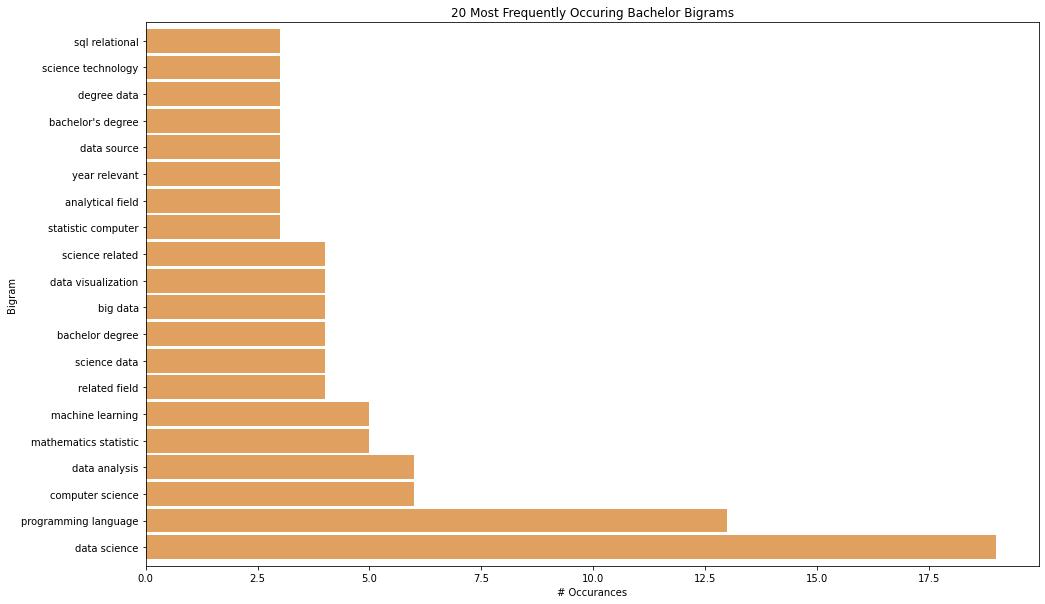

In [24]:
top_20_b_bigrams.sort_values(ascending=False).plot.barh(color='#E0A060', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Bachelor Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_b_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

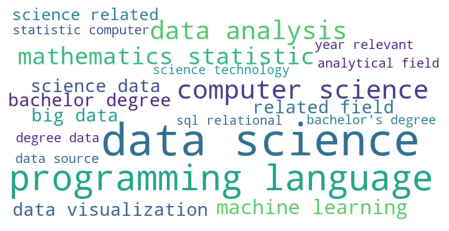

In [44]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_b_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

***

## Role vs. Degree

In [25]:
df.role.value_counts()

Data Scientist          90
Data Analyst            60
Data Science Manager    32
Data Engineer           32
Name: role, dtype: int64

In [26]:
train.role.value_counts()

Data Scientist          49
Data Analyst            30
Data Engineer           20
Data Science Manager    20
Name: role, dtype: int64

In [27]:
train.groupby('role').label.value_counts()

role                  label
Data Analyst          h        25
                      b         5
Data Engineer         h        20
Data Science Manager  h        18
                      b         2
Data Scientist        h        46
                      b         3
Name: label, dtype: int64

<AxesSubplot:xlabel='role', ylabel='count'>

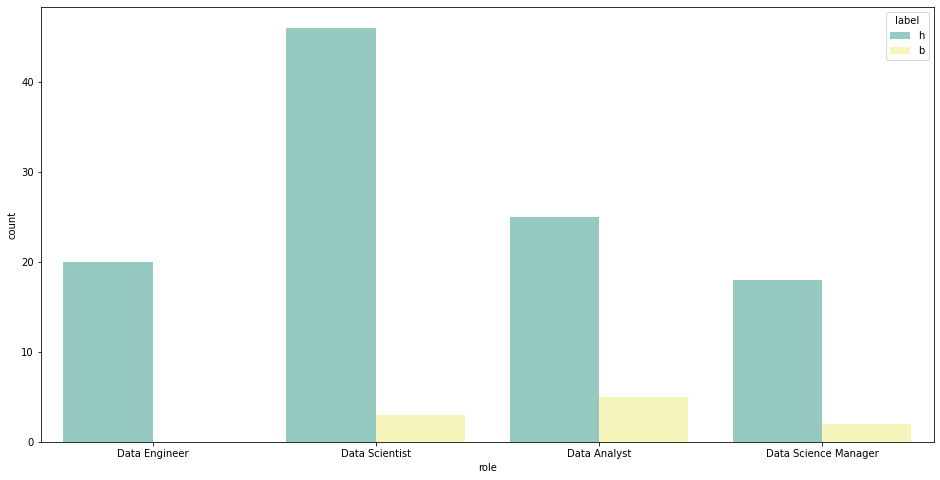

In [28]:
plt.figure(figsize = (16,8))
sns.countplot(x='role', hue='label', data=train, palette = 'Set3')

***

## Skills vs. Degree

In [29]:
# Separating skills into 3 Series: all, b, h
all_skills = ' '.join(train.skills)
b_skills = ' '.join(train[train.label == 'b'].skills)
h_skills = ' '.join(train[train.label == 'h'].skills)
all_skills = clean(all_skills)
b_skills = clean_skills(b_skills)
h_skills = clean_skills(h_skills)

In [30]:
pd.Series(all_skills.split()).value_counts().head(20)

data          113
microsoft     103
sql            96
python         70
c              68
learning       63
machine        54
analysis       46
r              39
leadership     37
excel          28
tableau        28
java           27
javascript     26
modeling       25
powerpoint     24
analytics      22
word           19
sheet          18
style          18
dtype: int64

In [31]:
all_skills_freq = pd.Series(all_skills.split()).value_counts()
b_skills_freq = pd.Series(b_skills.split()).value_counts()
h_skills_freq = pd.Series(h_skills.split()).value_counts()

In [32]:
skill_counts = pd.concat([all_skills_freq, b_skills_freq, h_skills_freq], sort=True, axis=1)
skill_counts.columns = ['all', 'b', 'h']
skill_counts = skill_counts.fillna(0).apply(lambda s: s.astype(int))

In [33]:
skill_counts.sort_values(by='all', ascending=False)

,all,b,h
data,113,13,100
microsoft,103,5,98
sql,96,6,90
python,70,5,65
c,68,7,61
...,...,...,...
io,1,0,1
javase,1,1,0
javaserver,1,0,1
jmp,1,0,1


<AxesSubplot:>

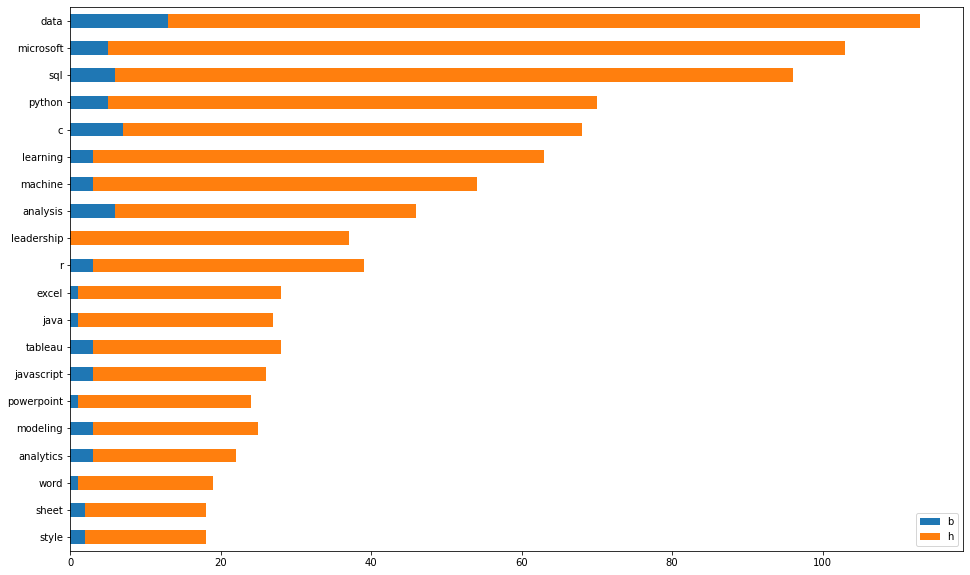

In [34]:
skill_counts.assign(p_b=skill_counts.b / skill_counts['all'],p_h=skill_counts.h / skill_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['b', 'h']]\
    .sort_values(by='h')\
    .plot.barh(stacked=True, figsize = (16,10))

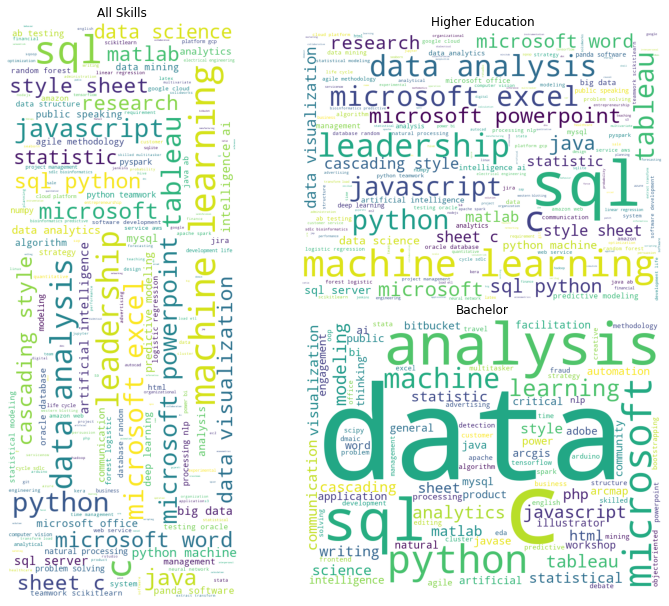

In [35]:
all_skills_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_skills)
h_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(h_skills)
b_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(b_skills)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_skills_cloud)
axs[1].imshow(h_skills_cloud)
axs[2].imshow(b_skills_cloud)

axs[0].set_title('All Skills')
axs[1].set_title('Higher Education')
axs[2].set_title('Bachelor')

for ax in axs: ax.axis('off')

### Bigrams

In [36]:
pd.Series(nltk.ngrams(all_skills.split(), 2)).value_counts().head(20)

(machine, learning)           53
(data, analysis)              35
(microsoft, excel)            28
(microsoft, powerpoint)       24
(sql, python)                 19
(microsoft, word)             19
(data, visualization)         18
(cascading, style)            18
(sheet, c)                    18
(style, sheet)                18
(data, science)               16
(python, machine)             15
(intelligence, ai)            14
(sql, server)                 14
(artificial, intelligence)    14
(python, sql)                 13
(microsoft, sql)              13
(big, data)                   13
(predictive, modeling)        12
(data, analytics)             12
dtype: int64

#### Higher Education

In [37]:
top_20_h_skill_bigrams = (pd.Series(nltk.ngrams(h_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_h_skill_bigrams.head()

(machine, learning)        50
(data, analysis)           31
(microsoft, excel)         27
(microsoft, powerpoint)    23
(sql, python)              18
dtype: int64

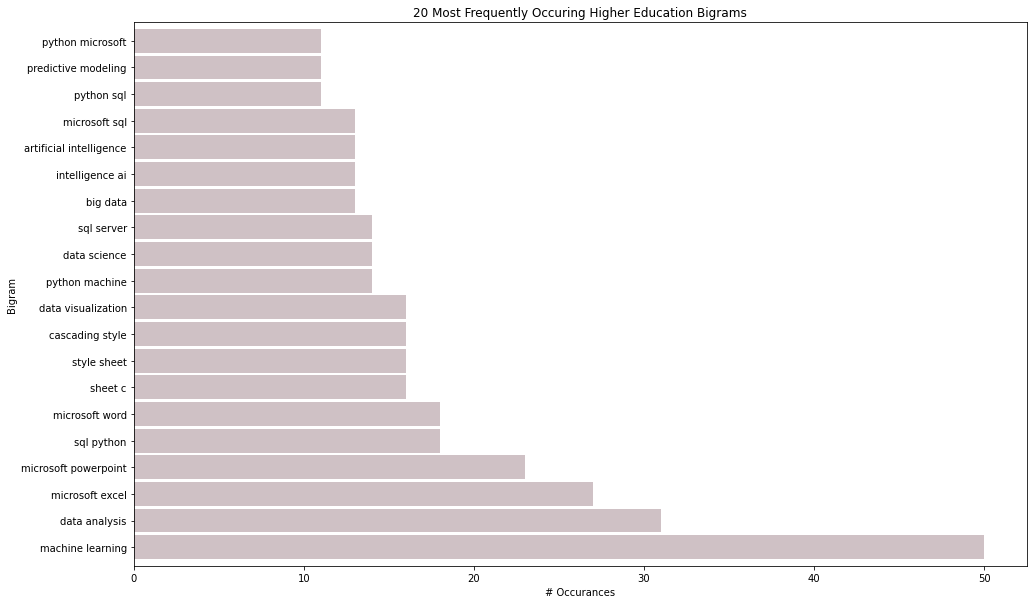

In [38]:
top_20_h_skill_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Higher Education Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_h_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

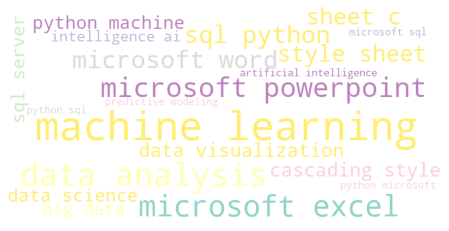

In [39]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_h_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400, colormap='Set3').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [40]:
top_20_b_skill_bigrams = (pd.Series(nltk.ngrams(b_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_b_skill_bigrams.head()

(data, analysis)         4
(machine, learning)      3
(python, sql)            2
(data, visualization)    2
(data, science)          2
dtype: int64

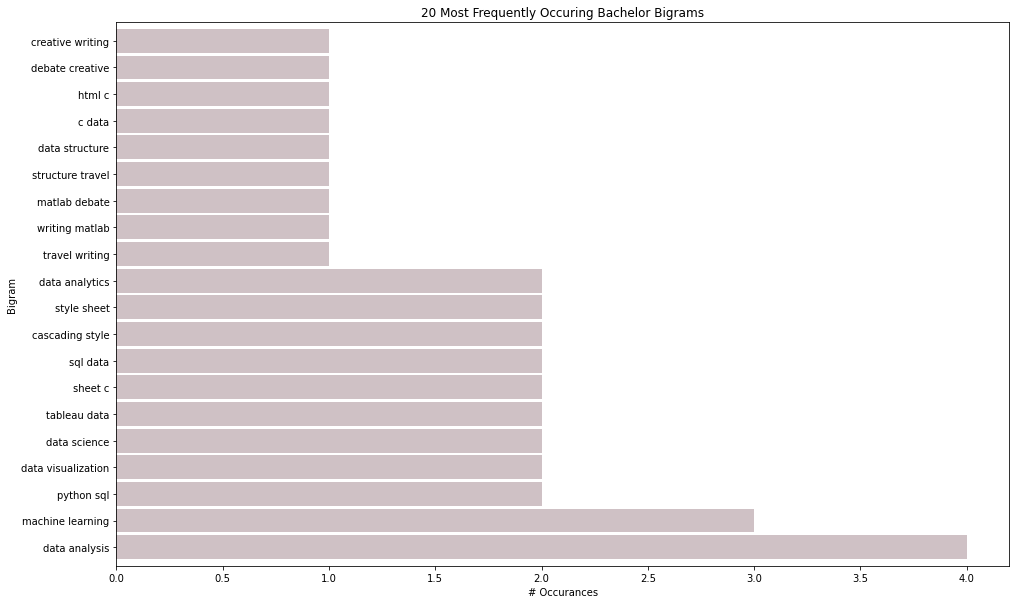

In [41]:
top_20_b_skill_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Bachelor Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_b_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

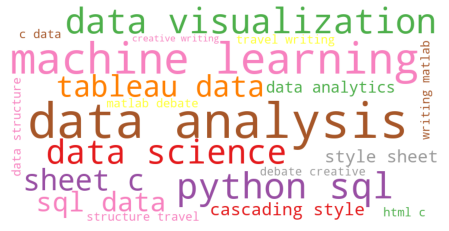

In [42]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_b_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400,  colormap='Set1').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
train.label.value_counts()

h    109
b     10
Name: label, dtype: int64